Type of model: Sequential
Add a new layer? (y/n)y
Name of layer: Dense
	units [defaul: non-exist]: 50
	activation [defaul: None]: relu
	use_bias [defaul: True]: 
	kernel_initializer [defaul: glorot_uniform]: he_uniform
	bias_initializer [defaul: zeros]: 
	kernel_regularizer [defaul: None]: 
	bias_regularizer [defaul: None]: 
	activity_regularizer [defaul: None]: 
	kernel_constraint [defaul: None]: 
	bias_constraint [defaul: None]: 
Add a new layer? (y/n)y
Name of layer: Dense
	units [defaul: non-exist]: 3
	activation [defaul: None]: softmax
	use_bias [defaul: True]: 
	kernel_initializer [defaul: glorot_uniform]: 
	bias_initializer [defaul: zeros]: 
	kernel_regularizer [defaul: None]: 
	bias_regularizer [defaul: None]: 
	activity_regularizer [defaul: None]: 
	kernel_constraint [defaul: None]: 
	bias_constraint [defaul: None]: 
Add a new layer? (y/n)n
Optimizer: SGD
	learning_rate [defaul: 0.01]: 0.001
	momentum [defaul: 0.0]: 0.9
	nesterov [defaul: False]: 
	name [defaul: SGD]: 
Compile

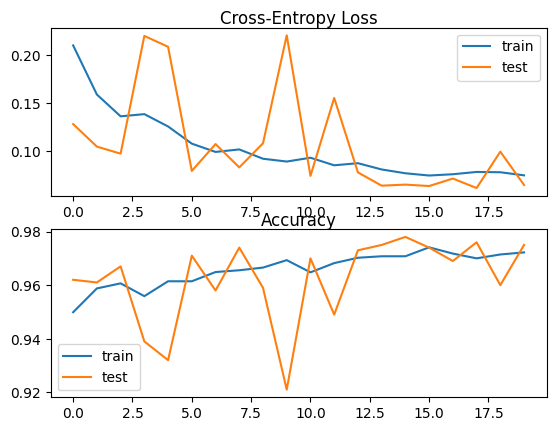

In [1]:
from source import *
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import matplotlib.pyplot as plt

def test_main():
    # generate 2d classification dataset
    x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=4)

    # one hot encode output variable
    y = to_categorical(y)

    # split into train test
    n_train = 800
    train_x, train_y = x[:n_train], y[:n_train]
    test_x, test_y = x[n_train:], y[n_train:]

    # define and compile model
    model = model_build()
    
    # generate 2d classification dataset
    x, y = make_blobs(n_samples=10000, centers=3, n_features=4, cluster_std=3, random_state=4)

    # one hot encode output variable
    y = to_categorical(y)

    # split into train test
    n_train = 9000
    train_x, train_y = x[:n_train], y[:n_train]
    test_x, test_y = x[n_train:], y[n_train:]
    
    history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=20, verbose=1, batch_size=8)
    # evaluate the model
    _, train_acc = model.evaluate(train_x, train_y, verbose=0)
    _, test_acc  = model.evaluate(test_x,  test_y,  verbose=0)
    print(f"Train: {train_acc*100:.1f}% Test: {test_acc*100:.1f}")

    plt.subplot(211)
    plt.title('Cross-Entropy Loss', pad=-40)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    # plot accuracy learning curves
    plt.subplot(212)
    plt.title('Accuracy', pad=-40)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

test_main()